# Implement the perceptron algorithm from scratch

The Perceptron is a classification algorithm for problems with two classes (0 and 1) where a linear equation (or a hyperplane) can be used to separate the two classes.

The perceptron will recieve input signals(m1 and m2) from the examples of the training data that is individually weighted(w1 and w2) and added with a common bias(b, unique for each layer in case of multi-layer). The weights of the Perceptron algorithm is estimated from the training data using Stochastic Gradient Descent.

The activation fuction(in this case sigmoid) is then used to transform the results into output value or prediction

In [0]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np

In [0]:
def NN(m1, m2, w1, w2, b):
  z = m1 * w1 + m2 * w2 + b
  return sigmoid(z)

In [0]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

In [0]:
w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

In [6]:
NN(3, 1.5, w1, w2, b)

0.9408065491538466

In above cells I created a basic feed forward perceptron that gives out random scores. To get more accurate results, we need to define the cost function, which takes the true value and predictions into consideration. This cost fucntion is called RMSE(Root Mean Squared Error).

Then the goal is to minimize this cost function to get predictions much closer to the actual values. To do this we will use the stochastic gradient descent method 

In [0]:
# Data is in the format of attribute 1, attribute 2 and type(target)
data = [[3, 1.5, 1],
        [2, 1, 0],
        [4, 1.5, 1],
        [3, 1, 0],
        [3.5, 0.5, 1],
        [2, 0.5, 0],
        [5.5, 1, 1],
        [1, 1, 0]]

new_data = [4.5, 1]

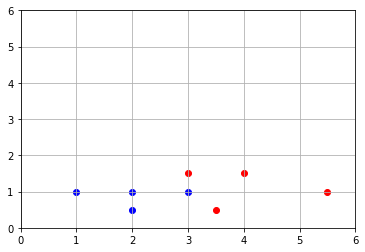

In [8]:
# Visualizing the data
plt.axis([0, 6, 0, 6])
plt.grid() 
for i in range(len(data)):
  point = data[i]
  color = 'r'
  if point[2] == 0:
    color = 'b'
  plt.scatter(point[0], point[1], c = color)

In [0]:
# Defining the sigmoid fuction(activation function)
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Defining the derivative of sigmoid fuction
def sigmoid_der(x):
  return sigmoid(x) * (1 - sigmoid(x))

In [10]:
# Visulaizing the sigmoid function on 100 random numbers
T = np.linspace(-5, 5, 100)
Y = sigmoid(T)
Y

array([0.00669285, 0.00739896, 0.00817894, 0.00904041, 0.00999169,
       0.01104196, 0.01220126, 0.01348063, 0.01489212, 0.01644893,
       0.01816549, 0.02005754, 0.0221422 , 0.02443814, 0.02696557,
       0.02974643, 0.03280439, 0.036165  , 0.0398557 , 0.04390588,
       0.04834692, 0.05321217, 0.0585369 , 0.06435824, 0.07071501,
       0.07764755, 0.0851974 , 0.093407  , 0.1023192 , 0.11197671,
       0.12242144, 0.13369374, 0.14583148, 0.1588691 , 0.17283646,
       0.18775769, 0.20364993, 0.22052213, 0.23837374, 0.25719365,
       0.2769591 , 0.29763488, 0.31917283, 0.34151151, 0.36457644,
       0.38828059, 0.41252537, 0.43720205, 0.46219351, 0.48737642,
       0.51262358, 0.53780649, 0.56279795, 0.58747463, 0.61171941,
       0.63542356, 0.65848849, 0.68082717, 0.70236512, 0.7230409 ,
       0.74280635, 0.76162626, 0.77947787, 0.79635007, 0.81224231,
       0.82716354, 0.8411309 , 0.85416852, 0.86630626, 0.87757856,
       0.88802329, 0.8976808 , 0.906593  , 0.9148026 , 0.92235

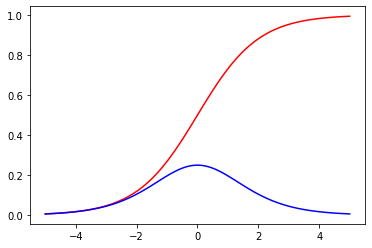

In [11]:
'''By these plots we can see the value of the derivative(slope) is highest when
the sigmoid curve is the steepest'''
plt.plot(T, sigmoid(T), c = 'r')
plt.plot(T, sigmoid_der(T), c = 'b')

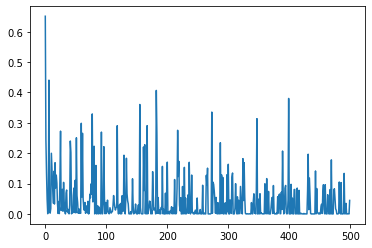

In [29]:
# Training loop

# Creating the network with attribute inputs and type
w1 = np.random.rand()
w2 = np.random.rand()
b = np.random.rand()

# Initializing the learning rate used to limit the amount each weight 
# is corrected each time it is updated
learning_rate = 0.2
costs = [] # a list to store costs

'''
Running the loops for 50000 epochs 
There are 2 loops we need to perform:
  1. Loop over each row in the training data for an epoch
  2. Loop over each weight and update it for a row in epoch

Weights are updated based on the error the model made. The error is calculated 
as the difference between the expected output value and the prediction made with
the candidates weights.
'''
for i in range(50000):
  random_index = np.random.randint(len(data))
  point = data[random_index]

  z = point[0] * w1 + point[1] * w2 + b # Weighted average of all points
  pred = sigmoid(z) 
  
  target = point[2]
  cost = np.square(pred - target)

  dcost_pred = 2 * (pred - target) # Derivative of squared error fucntion
  dpred_dz = sigmoid_der(z) # Derivative of output from the sigmoid function

  dz_dw1 = point[0] # Derivative of z w.r.t w1
  dz_dw2 = point[1] # Derivative of z w.r.t w2
  dz_db = 1 # Derivative of z w.r.t b
  
  # Implementing the chain rule
  dcost_dz = dcost_pred * dpred_dz
  dcost_dw1 = dcost_dz * dz_dw1
  dcost_dw2 = dcost_dz * dz_dw2
  dcost_db = dcost_dz * dpred_dz * dz_db

  # Gradient Descent to optimize the cost function
  w1 = w1 - learning_rate * dcost_dw1
  w2 = w2 - learning_rate * dcost_dw2
  b = b - learning_rate * dcost_db
  
  if i % 100 == 0:
    cost_sum = 0
    for j in range(len(data)):
      point = data[random_index]

      z = point[0] * w1 + point[1] * w2 + b
      pred = sigmoid(z)

      target = point[2]
      cost_sum += np.square(pred - target)

    costs.append(cost_sum / len(data))

plt.plot(costs) # We can see the cost decreasing 

In [30]:
# Model Predictions

for i in range(len(data)):
  point = data[i]
  print(point)
  z = point[0] * w1 + point[2] * w2 + b
  pred = sigmoid(z)
  print('Target: {}'.format(point[2]))
  print('Prediction: {}'.format(pred))

[3, 1.5, 1]
Target: 1
Prediction: 0.6434978725479034
[2, 1, 0]
Target: 0
Prediction: 0.00537664845053053
[4, 1.5, 1]
Target: 1
Prediction: 0.9904084013616118
[3, 1, 0]
Target: 0
Prediction: 0.2361962943797341
[3.5, 0.5, 1]
Target: 1
Prediction: 0.9317510847479198
[2, 0.5, 0]
Target: 0
Prediction: 0.00537664845053053
[5.5, 1, 1]
Target: 1
Prediction: 0.9999776174549239
[1, 1, 0]
Target: 0
Prediction: 9.448734021990932e-05


In [31]:
# Let's check for the new data

z = new_data[0] * w1 + new_data[1] * w2 + b
pred = sigmoid(z)
pred

0.9987212024746831

In [0]:
# Function to give out predictions

def which_value(v1, v2):
  z = v1 * w1 + v2 * w2 + b
  pred = sigmoid(z)
  if pred > 0.5:
    print('Prediction is 1')
  else:
    print('Prediction is 0')

In [33]:
which_value(5,4)

Prediction is 1
